In [1]:
import numpy as np
import astropy 
import h5py
from astropy.io import fits
from astrodendro import Dendrogram, pp_catalog


In [2]:
pip install astrodendro

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/python/3.7.3/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
data = fits.getdata('/home/student04/Newrepos/moment0.fits')

In [4]:
d = Dendrogram.compute(data,min_value= 3.9,min_delta=0.133) 

/home/student04/.local/lib/python3.7/site-packages/astrodendro/dendrogram.py:177: RuntimeWarning: invalid value encountered in greater
  keep = self.data > min_value


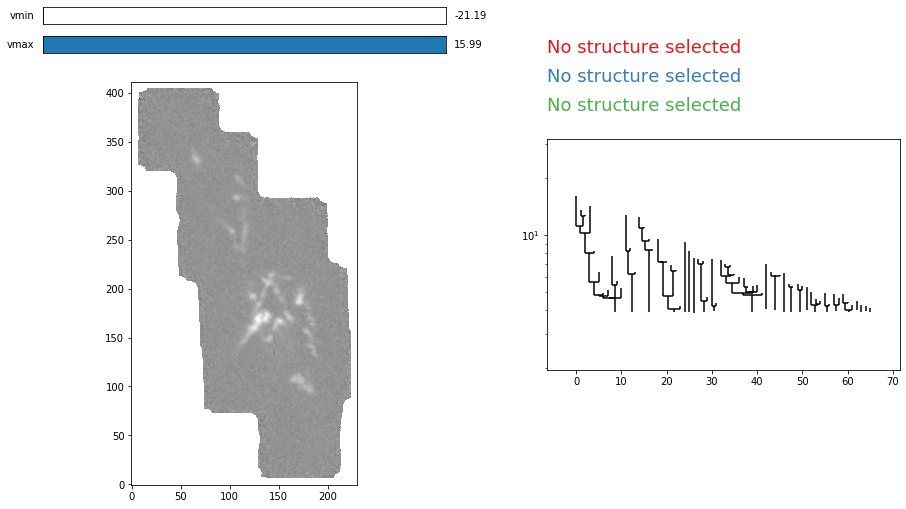

In [5]:
v = d.viewer()

In [6]:
from astrodendro.analysis import PPStatistic


In [7]:
from astropy import units as u

In [8]:
metadata={}
metadata['data_unit']= u.Jy
metadata['spatial_scale']= 8.8*u.arcsec
metadata['beam_major']=30.8*u.arcsec
metadata['beam_minor']=30.8*u.arcsec

In [9]:
cat = pp_catalog(d,metadata)
cat.pprint(show_unit=True,max_lines=10)

Computing catalog for 107 structures

[>                                        ] 0%
[>                                        ] 1%
[=>                                       ] 2%
[=>                                       ] 3%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 6%
[==>                                      ] 7%
[===>                                     ] 8%
[===>                                     ] 9%
[====>                                    ] 10%
[====>                                    ] 11%
[====>                                    ] 12%
[=====>                                   ] 13%
[=====>                                   ] 14%
[=====>                                   ] 14%
[======>                                  ] 15%


[======>                                  ] 16%
[=======>                                 ] 17%
[=======>                                 ] 18%
[=======>                                 ] 19%
[========>                                ] 20%
[========>                                ] 21%
[========>                                ] 22%
[=========>                               ] 23%
[=========>                               ] 24%
[==========>                              ] 25%
[==========>                              ] 26%
[==========>                              ] 27%
[===========>                             ] 28%
[===========>                             ] 28%
[===========>                             ] 29%
[============>                            ] 30%
[============>                            ] 31%
[=============>                           ] 32%
[=============>                           ] 33%
[=============>                           ] 34%
[==============>                       

In [10]:
d1 = Dendrogram.load_from('/home/student04/Newrepos/NGC1333_dendrogram.fits')

/home/student04/.local/lib/python3.7/site-packages/astrodendro/viewer.py:95: UserWarning: `WCSAxes` package required for wcs coordinate display.
  warnings.warn("`WCSAxes` package required for wcs coordinate display.")


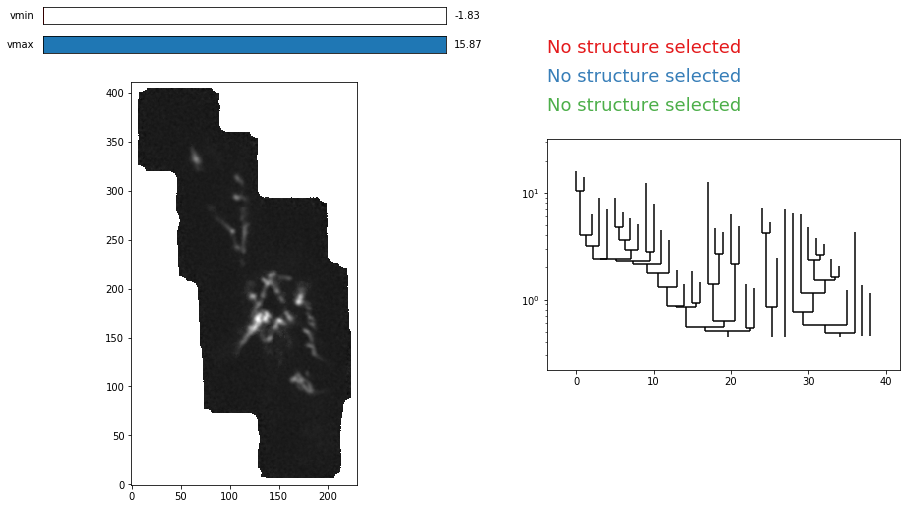

In [11]:
v1 = d1.viewer()

In [12]:
m0 = fits.open('/home/student04/Downloads/NGC1333_NH3_11_all_rebase3_mom0_QA_trim.fits')

In [13]:
m0[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  231                                                  
NAXIS2  =                  412                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                115.5 / Pixel coordinate of reference point            
CRPIX2  =                206.0 / Pixel coordinate of reference point            
CDELT1  =  -0.0024440485689343 / [deg] Coordinate increment at reference point  
CDELT2  =   0.0024440485689343 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'        

In [14]:
#Converting the spatial axis and beam size into arcsecs
spatial_axis = (0.0024440485689343*u.deg).to(u.arcsec)
bmaj = (0.008554169991270138*u.deg).to(u.arcsec)
bmin = (0.008554169991270138*u.deg).to(u.arcsec)

In [15]:
metadata={}
metadata['data_unit']= u.Jy
metadata['spatial_scale']= spatial_axis
metadata['beam_major']= bmaj
metadata['beam_minor']= bmin

In [16]:
cat1 = pp_catalog(d1,metadata)
cat1.pprint(show_unit=True,max_lines=10)

Computing catalog for 72 structures

[>                                        ] 1%
[=>                                       ] 2%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 6%
[===>                                     ] 8%
[===>                                     ] 9%
[====>                                    ] 11%
[=====>                                   ] 12%
[=====>                                   ] 13%
[======>                                  ] 15%
[======>                                  ] 16%
[=======>                                 ] 18%
[=======>                                 ] 19%
[========>                                ] 20%
[========>                                ] 22%
[=========>                               ] 23%
[==========>                              ] 25%
[==========>                              ] 26%
[===========>                             ] 27%
[=========


[============>                            ] 31%
[=============>                           ] 33%
[=============>                           ] 34%
[==============>                          ] 36%
[==============>                          ] 37%
[===============>                         ] 38%
[================>                        ] 40%
[================>                        ] 41%
[=================>                       ] 43%
[=================>                       ] 44%
[==================>                      ] 45%
[==================>                      ] 47%
[===================>                     ] 48%
[===================>                     ] 49%
[====================>                    ] 51%
[=====================>                   ] 52%
[=====================>                   ] 54%
[======================>                  ] 55%
[======================>                  ] 56%
[=======================>                 ] 58%
[=======================>              

In [17]:
position_angle = np.zeros([72])
for i in range(72):
    s = d1[i]
    stat = PPStatistic(s,metadata=metadata)
    position_angle[(i)]= stat.position_angle/(1*u.deg)

(array([ 2.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  3.,  2., 15.,  6.,  6.,  8.,  7.,
         2.,  4.,  6.,  5.]),
 array([-169.42772464, -157.94773067, -146.46773671, -134.98774274,
        -123.50774877, -112.0277548 , -100.54776083,  -89.06776687,
         -77.5877729 ,  -66.10777893,  -54.62778496,  -43.14779099,
         -31.66779702,  -20.18780306,   -8.70780909,    2.77218488,
          14.25217885,   25.73217282,   37.21216679,   48.69216075,
          60.17215472,   71.65214869,   83.13214266,   94.61213663,
         106.0921306 ,  117.57212456,  129.05211853,  140.5321125 ,
         152.01210647,  163.49210044,  174.9720944 ]),
 <a list of 30 Patch objects>)

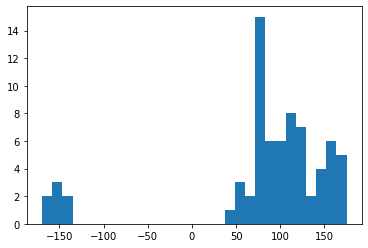

In [18]:
#Plotting histogram of position angle for all structures
from matplotlib import pyplot as plt
plt.hist(position_angle,bins=30)

(array([2., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 2., 5., 1., 2., 4., 6., 2., 2., 5., 5.]),
 array([-169.42772464, -157.94773067, -146.46773671, -134.98774274,
        -123.50774877, -112.0277548 , -100.54776083,  -89.06776687,
         -77.5877729 ,  -66.10777893,  -54.62778496,  -43.14779099,
         -31.66779702,  -20.18780306,   -8.70780909,    2.77218488,
          14.25217885,   25.73217282,   37.21216679,   48.69216075,
          60.17215472,   71.65214869,   83.13214266,   94.61213663,
         106.0921306 ,  117.57212456,  129.05211853,  140.5321125 ,
         152.01210647,  163.49210044,  174.9720944 ]),
 <a list of 30 Patch objects>)

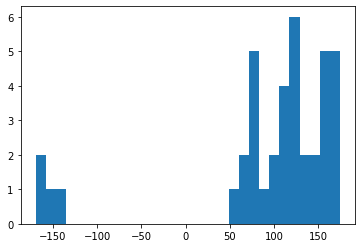

In [19]:
#plotting the histogram of position angle for only leaf structure
a = []
for i in range(72):
    if d1[i].is_leaf:
        s = d1[i]
        stat = PPStatistic(s,metadata=metadata)
        a.append(stat.position_angle/(1*u.deg))
position_angle_leaf = np.array(a)
plt.hist(position_angle_leaf,bins=30)

In [20]:
position_angle_leaf.size

39

In [21]:
elongation = []
for i in range(72):
    if d1[i].is_leaf:
        s = d1[i]
        stat = PPStatistic(s,metadata=metadata)
        elongation.append(stat.major_sigma/stat.minor_sigma)
elongation_leaf = np.array(elongation)

Text(0.5, 1.0, 'Position vs Elongation')

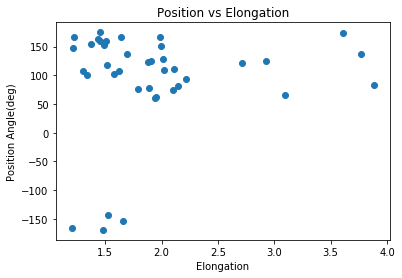

In [22]:
plt.scatter(elongation_leaf,position_angle_leaf)
plt.ylabel('Position Angle(deg)')
plt.xlabel('Elongation')
plt.title('Position vs Elongation')

In [23]:
area = []
for i in range(72):
    if d1[i].is_leaf:
        s = d1[i]
        stat = PPStatistic(s,metadata=metadata)
        area.append(stat.area_exact/(u.arcsec)**2)
area_leaf = np.array(area)

Text(0.5, 1.0, 'Elongation vs Area')

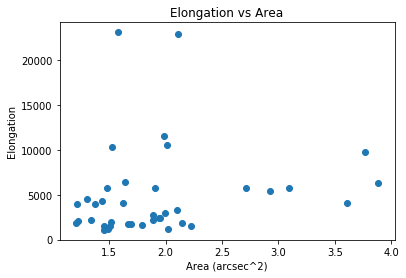

In [24]:
plt.scatter(elongation_leaf,area_leaf)
plt.xlabel('Area (arcsec^2)')
plt.ylabel('Elongation')
plt.title('Elongation vs Area')

In [40]:
image = fits.getdata('/home/student04/Downloads/NGC1333_NH3_11_all_rebase3_mom0_QA_trim.fits')
p = d1.plotter()

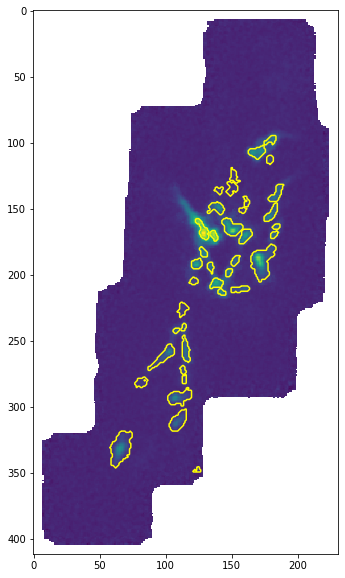

In [67]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.imshow(image)
for i in range(72):
    if d1[i].is_leaf:
        p.plot_contour(ax,structure=i,colors='yellow')